TASK: WEB SCRAPING AND SENTIMENT ANALYSIS
Extract reviews of any product from ecommerce website like amazon

Perform emotion mining

MPORTING LIBRARIES

In [4]:
from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

READING DATA

In [5]:
bt='https://www.amazon.in'
ul='https://www.amazon.in/Apple-MacBook-Air-13-3-inch-MQD32HN/product-reviews/B073Q5R6VR/ref=cm_cr_getr_d_paging_btm_next_30?ie=UTF8&reviewerType=all_reviews'

In [6]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [9]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [10]:
len(cust_name)

2284

In [11]:
len(review_title)

2284

In [12]:
len(review_content)

2284

In [13]:
len(rate)

2284

In [14]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [15]:
!pip install -U textblob
!python -m textblob.download_corpora

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('stopwords')

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
df = pd.DataFrame()

In [17]:


df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Rating'] = rate
df['Reviews'] = review_content

In [18]:
df.head(10)

,Customer Name,Review Title,Rating,Reviews
0,ba_doh,Read this review before you buy ... may save y...,4.0 out of 5 stars,Okay. So you have been seeing people display...
1,Shantanu Bangar,Superb,5.0 out of 5 stars,It's amazing..... battery last around 10 -12...
2,PK Singh,"Finally, got my Mac !!!!",5.0 out of 5 stars,Finally a MacBook possession. Got it in 50k ...
3,Sumit Kukade,DEAD after 1 year two months...,1.0 out of 5 stars,We buy macbook's expecting that it will last...
4,saurabh chauhan,My first apple product: fully satisfied- here ...,5.0 out of 5 stars,Best Laptop under 60k. If you don't want any...
5,Kaushal,Justified Apple Product,5.0 out of 5 stars,Pros:1. Light weight and super fast response...
6,Anvit shetty,Dead mac book air,1.0 out of 5 stars,"Bought this product recently on 5 April, was..."
7,Romeo Menezes,MacBook motherboard and battery collapsed.,1.0 out of 5 stars,I am very upset about the product as I check...
8,Jagdeep Sharma,Takes six figure out of your pocket and then d...,1.0 out of 5 stars,"Hi, Think thousand time before buying. One c..."
9,Jason,Perfect product!,4.0 out of 5 stars,I have been a Macbook pro user for last 2 ye...


In [19]:
df.to_csv(r'E:fill.csv',index = True)

In [20]:
data = pd.read_csv("E:fill.csv",index_col=[0])

In [21]:
data.dtypes

Customer Name    object
Review Title     object
Rating           object
Reviews          object
dtype: object

In [22]:
data['Rating'] = [titles.rstrip(' out of 5 stars') for titles in data['Rating']]

In [23]:
data['Rating']

0       4.0
1       5.0
2       5.0
3       1.0
4       5.0
       ... 
2279    5.0
2280    5.0
2281    5.0
2282    5.0
2283    5.0
Name: Rating, Length: 2284, dtype: object

In [24]:
data['Rating'].value_counts(normalize=True)*100

5.0    67.469352
1.0    13.441331
4.0    12.915937
3.0     3.371278
2.0     2.802102
Name: Rating, dtype: float64

In [25]:
ratings=data.groupby(['Rating']).count()
ratings

,Customer Name,Review Title,Reviews
Rating,,,
1.0,307,307,307
2.0,64,64,64
3.0,77,77,77
4.0,295,295,295
5.0,1541,1541,1539


Text(0, 0.5, 'Count')

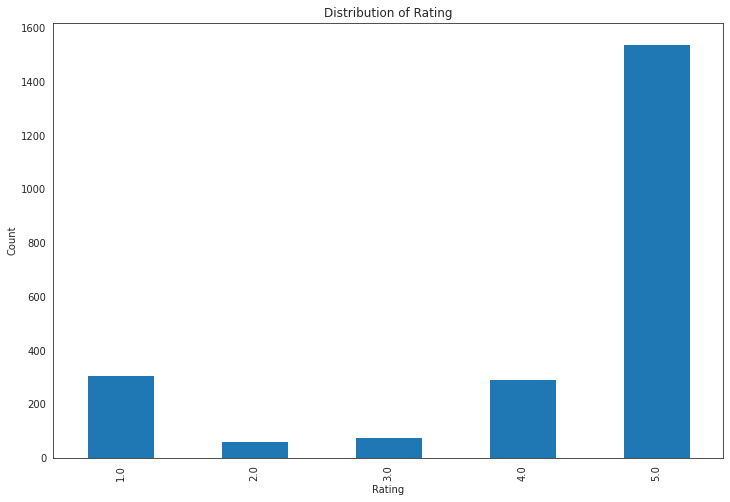

In [26]:
plt.figure(figsize=(12,8))
data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

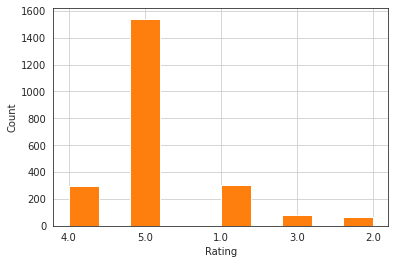

In [27]:
data.Rating.hist()
data.Rating.hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')

In [28]:
data.iloc[:,[3]]

,Reviews
0,Okay. So you have been seeing people display...
1,It's amazing..... battery last around 10 -12...
2,Finally a MacBook possession. Got it in 50k ...
3,We buy macbook's expecting that it will last...
4,Best Laptop under 60k. If you don't want any...
...,...
2279,good
2280,Good
2281,👍👍👍
2282,Good value


In [29]:
Reviews=data.iloc[:,[3]]

In [31]:
Reviews.shape

(2284, 1)

In [30]:
Reviews.describe()

,Reviews
count,2282
unique,2101
top,Good
freq,35


In [32]:
Reviews.dtypes

Reviews    object
dtype: object

In [33]:
# removing customer name and reviw title column as they have not that significance in output##
data.drop(["Customer Name","Review Title"],axis=1,inplace=True)

data.head()

,Rating,Reviews
0,4.0,Okay. So you have been seeing people display...
1,5.0,It's amazing..... battery last around 10 -12...
2,5.0,Finally a MacBook possession. Got it in 50k ...
3,1.0,We buy macbook's expecting that it will last...
4,5.0,Best Laptop under 60k. If you don't want any...


In [34]:
data.Reviews.isna().sum()

2

In [35]:
data['Reviews']=data['Reviews'].fillna(" ")

In [36]:
data.Reviews.isna().sum()

0

In [38]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###

data['Reviews']= data['Reviews'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [39]:
## removing punctuation from review..#
import string
data['Reviews']=data['Reviews'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [40]:
## Remove Numbers from review...##
data['Reviews']=data['Reviews'].str.replace('[0-9]','')

In [41]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [43]:
stop_words=stopwords.words('english')

In [44]:

data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [45]:
data.head(5)

,Rating,Reviews
0,4.0,okay seeing people display macbooks always fan...
1,5.0,amazing battery last around hrsbest laptop stu...
2,5.0,finally macbook possession got k diwali sale t...
3,1.0,buy macbooks expecting lasts least years case ...
4,5.0,best laptop k dont want accounting softwares l...


In [46]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [47]:
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1    amazing battery last around hrsbest laptop stu...
2    finally macbook possession got  diwali sale te...
3    buy macbooks expecting last least year case sa...
4    best laptop  dont want accounting software lik...
Name: Reviews, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aaaaa  ab  abgn  abgnac  abide  ...  zeroed  zk  zone  zooming  zoomskype
0         0   0     0       0      0  ...       0   0     0        0          0
1         0   0     0       0      0  ...       0   0     0        0          0
2         0   0     0       0      0  ...       0   0     0        0          0
3         0   0     0       0      0  ...       0   0     0        0          0
4         0   0     0       0      0  ...       0   0     0        0          0
...     ...  ..   ...     ...    ...  ...     ...  ..   ...      ...        ...
2279      0   0     0       0      0  ...       0   0     0        0          0
2280      0   0     0       0      0  ...       0   0     0        0          0
2281      0   0     0       0      0  ...       0   0     0        0          0
2282      0   0     0       0      0  ...       0   0     0        0          0
2283      0   0     0       0      0  ...       0   0     0        0          0

[2284 rows x 6368 columns]


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 3908)	0.03545683079583392
  (0, 4733)	0.024988984943395458
  (0, 5398)	0.043701959699662146
  (0, 7)	0.03475630402539639
  (0, 519)	0.04541297854040043
  (0, 360)	0.04541297854040043
  (0, 54)	0.03475630402539639
  (0, 361)	0.04541297854040043
  (0, 2198)	0.025523961371748567
  (0, 4063)	0.037167849636572214
  (0, 5901)	0.04541297854040043
  (0, 2085)	0.04129041408848633
  (0, 5124)	0.04541297854040043
  (0, 5678)	0.04541297854040043
  (0, 5024)	0.038252225927692965
  (0, 4233)	0.043701959699662146
  (0, 5672)	0.03280249215572378
  (0, 346)	0.026939244944768705
  (0, 874)	0.037167849636572214
  (0, 4801)	0.04541297854040043
  (0, 112)	0.03584068031651714
  (0, 3518)	0.022185601088655672
  (0, 2764)	0.06886946728451987
  (0, 4083)	0.04541297854040043
  (0, 5348)	0.04541297854040043
  :	:
  (2283, 2188)	0.2556115403381602
  (2283, 4089)	0.24272236058773156
  (2283, 1401)	0.23357734201854394
  (2283, 4668)	0.21578792355160836
  (2283, 4331)	0.16952633814147838
  (2283, 6266)	0.13093

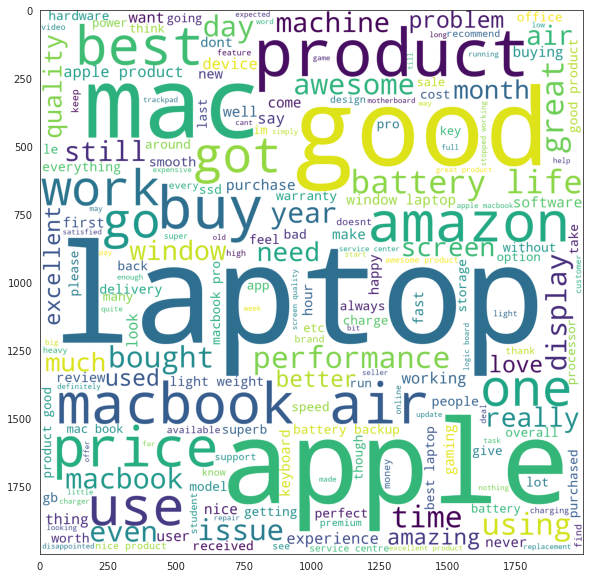

In [50]:
Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

## **Removing Punctuation**
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [51]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1    amazing battery last around hrsbest laptop stu...
2    finally macbook possession got  diwali sale te...
3    buy macbooks expecting last least year case sa...
4    best laptop  dont want accounting software lik...
Name: Reviews, dtype: object

# **Common word removal**
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [52]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

laptop     882
product    859
apple      737
good       642
macbook    557
mac        440
air        406
battery    404
buy        343
best       340
dtype: int64

# Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [53]:
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student coder
2    finally possession got diwali sale technically...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tally busy ...
Name: Reviews, dtype: object

## **Rare words removal**
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [54]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq

rangeprons       1
ecxellent        1
youneed          1
jackstereo       1
appstore         1
breezehowever    1
ecxel            1
prohaha          1
ke               1
usagealbeit      1
dtype: int64

In [55]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student cover
2    finally possession got dial sale technically l...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tall busy g...
5    pro light weight super fast response time high...
6    bought recently april working perfectly fine d...
7    upset checked day back december didn start luc...
8    hi think thousand time buying one calm night m...
9    pro user last year came across new got chance ...
Name: Reviews, dtype: object

## **2.7 Tokenization**
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [56]:
TextBlob(data['Reviews'][0]).words

WordList(['okay', 'seeing', 'people', 'display', 'macbooks', 'always', 'fancied', 'owning', 'one', 'premium', 'device', 'amazon', 'offer', 'reduced', 'price', 'getting', 'tempted', 'stop', 'consider', 'get', 'money', 'spend', 'think', 'add', 'premiumness', 'profile', 'device', 'next', 'line', 'support', 'withdrawn', 'resist', 'temptation', 'sell', 'last', 'reason', 'feeling', 'improves', 'profile', 'user', 'smirk', 'see', 'obsolete', 'dinosaur', 'device', 'display', 'latest', 'toysif', 'window', 'user', 'better', 'go', 'friend', 'try', 'activity', 'great', 'till', 'try', 'change', 'something', 'puny', 'mouse', 'cursor', 'realise', 'stuck', 'little', 'cozy', 'jail', 'try', 'anything', 'nonstandard', 'try', 'transferring', 'data', 'usb', 'stick', 'one', 'need', 'training', 'usb', 'partitioning', 'exfat', 'evn', 'partitioning', 'chance', 'window', 'recognise', 'usb', 'stick', 'power', 'user', 'real', 'pain', 'course', 'pretend', 'like', 'many', 'thousand', 'user', 'matter', 'hey', 'premiu

In [60]:
TextBlob(data['Reviews'][1]).words

WordList(['amazing', 'last', 'around', 'hrsbest', 'student', 'coder'])

**Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.**

In [61]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    okay see peopl display macbook alway fanci own...
1               amaz last around hrsbest student coder
2    final possess got diwali sale technic laptopgo...
3    macbook expect last least year case say cost r...
4    dont want account softwar like talli busi go b...
5    pro light weight super fast respons time highl...
6    bought recent april work perfectli fine day ap...
7    upset check day back decemb didnt start luckil...
8    hi think thousand time buy one calm night cudd...
9    pro user last year came across new got chanc p...
Name: Reviews, dtype: object


# **Lemmatization**
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [62]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()

0    okay seeing people display macbooks always fan...
1            amazing last around hrsbest student coder
2    finally possession got diwali sale technically...
3    macbooks expecting last least year case saying...
4    dont want accounting software like tally busy ...
Name: Reviews, dtype: object

# **Advance Text Processing**
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

# N-grams 
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [63]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['okay', 'seeing']),
 WordList(['seeing', 'people']),
 WordList(['people', 'display']),
 WordList(['display', 'macbooks']),
 WordList(['macbooks', 'always']),
 WordList(['always', 'fancied']),
 WordList(['fancied', 'owning']),
 WordList(['owning', 'one']),
 WordList(['one', 'premium']),
 WordList(['premium', 'device']),
 WordList(['device', 'amazon']),
 WordList(['amazon', 'offer']),
 WordList(['offer', 'reduced']),
 WordList(['reduced', 'price']),
 WordList(['price', 'getting']),
 WordList(['getting', 'tempted']),
 WordList(['tempted', 'stop']),
 WordList(['stop', 'consider']),
 WordList(['consider', 'get']),
 WordList(['get', 'money']),
 WordList(['money', 'spend']),
 WordList(['spend', 'think']),
 WordList(['think', 'add']),
 WordList(['add', 'premiumness']),
 WordList(['premiumness', 'profile']),
 WordList(['profile', 'device']),
 WordList(['device', 'next']),
 WordList(['next', 'line']),
 WordList(['line', 'support']),
 WordList(['support', 'withdrawn']),
 WordList(['wit

# **Term frequency**
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [64]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,coder,1.0
1,student,1.0
2,hrsbest,1.0
3,around,2.0
4,last,3.0
...,...,...
514,browse,1.0
515,update,1.0
516,speaker,1.0
517,premiumshould,1.0


# **Inverse Document Frequency**
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [65]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [66]:
tf1

,words,tf,idf
0,coder,1.0,6.124246
1,student,1.0,3.905042
2,hrsbest,1.0,7.733684
3,around,2.0,3.499577
4,last,3.0,3.079723
...,...,...,...
514,browse,1.0,4.843312
515,update,1.0,3.708332
516,speaker,1.0,4.401479
517,premiumshould,1.0,6.347389


The more the value of IDF, the more unique is the word.

# **Term Frequency** – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [67]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1


,words,tf,idf,tfidf
0,coder,1.0,6.124246,6.124246
1,student,1.0,3.905042,3.905042
2,hrsbest,1.0,7.733684,7.733684
3,around,2.0,3.499577,6.999154
4,last,3.0,3.079723,9.239170
...,...,...,...,...
514,browse,1.0,4.843312,4.843312
515,update,1.0,3.708332,3.708332
516,speaker,1.0,4.401479,4.401479
517,premiumshould,1.0,6.347389,6.347389


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<2284x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 22846 stored elements in Compressed Sparse Row format>

# **Bag of Words**
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<2284x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 26180 stored elements in Compressed Sparse Row format>

# **Sentiment Analysis**
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [70]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0     (0.15157563025210086, 0.41818394024276373)
1     (0.30000000000000004, 0.48333333333333334)
2       (-0.0043103448275862, 0.529022988505747)
3                   (-0.15, 0.23333333333333334)
4      (0.18055555555555555, 0.4601851851851852)
5       (0.3518253968253968, 0.6041269841269842)
6                    (0.11333333333333333, 0.36)
7    (-0.08833333333333333, 0.43166666666666664)
8                (-0.09843749999999998, 0.54375)
9       (0.160990146217419, 0.44677368086458996)
Name: Reviews, dtype: object

Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.¶

In [71]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,okay seeing people display macbooks always fan...,0.151576
1,amazing last around hrsbest student coder,0.300000
2,finally possession got diwali sale technically...,-0.004310
3,macbooks expecting last least year case saying...,-0.150000
4,dont want accounting software like tally busy ...,0.180556


# **Word Embeddings**
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

In [72]:
!pip install gensim
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [73]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'negative-words.txt'
word2vec_output_file = 'positive-words.txtpd.read_csv'

In [74]:
#glove2word2vec(glove_input_file, word2vec_output_file)

In [75]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [76]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,okay seeing people display macbooks always fan...,0.151576
1,amazing last around hrsbest student coder,0.300000
2,finally possession got diwali sale technically...,-0.004310
3,macbooks expecting last least year case saying...,-0.150000
4,dont want accounting software like tally busy ...,0.180556


In [77]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Rating,Reviews,sentiment,polarity
0,4.0,okay seeing people display macbooks always fan...,0.151576,0.151576
1,5.0,amazing last around hrsbest student coder,0.300000,0.300000
4,5.0,dont want accounting software like tally busy ...,0.180556,0.180556
5,5.0,pro light weight super fast response time high...,0.351825,0.351825
6,1.0,bought recently april working perfectly fine d...,0.113333,0.113333


In [78]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [79]:
data["category"]=data['polarity']

In [80]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [81]:
data["category"]=data["category"].astype('category')
data.dtypes

Rating         object
Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

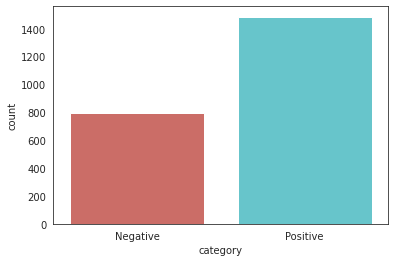

In [82]:
sns.countplot(x='category',data=data,palette='hls')

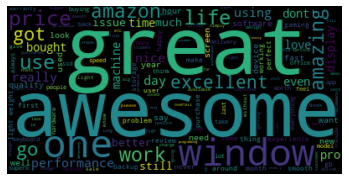

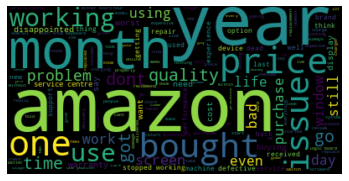

In [83]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()